<a href="https://colab.research.google.com/github/HussainAhmed75/NTI-AI-and-ML-exercises-/blob/main/Data_preprocessing_House_rent_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


In [174]:
df=pd.read_csv('/content/House_Rent_Dataset.csv')

In [175]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,5/13/2022,2,20000.0,NaN,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,5/16/2022,2,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,7/4/2022,2,10000.0,NaN,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,5/9/2022,2,7500.0,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4741 non-null   float64
 3   Size               4738 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4739 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4742 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 445.1+ KB


In [177]:
df.isnull().sum().sort_values(ascending=False)

,0
Size,8
Area Type,7
Rent,5
Bathroom,4
Posted On,0
BHK,0
Area Locality,0
Floor,0
City,0
Furnishing Status,0


In [178]:
df['Size']

,Size
0,1100.0
1,NaN
2,1000.0
3,NaN
4,850.0
...,...
4741,1000.0
4742,2000.0
4743,1750.0
4744,1500.0


In [179]:
df['Size'].skew()

np.float64(2.2981542396330705)

In [180]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan,strategy='median') #'median', 'mean', 'constant', 'most_frequent'

# Fit the imputer on both 'Size' and 'Rent' columns at once
imputer.fit(df[['Size', 'Rent','Bathroom']])

# Transform both columns using the fitted imputer
df[['Size', 'Rent','Bathroom']] = imputer.transform(df[['Size', 'Rent','Bathroom']])

In [181]:
df['Size'].isnull().sum()

np.int64(0)

In [182]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df[['Area Type']] = imputer.fit_transform(df[['Area Type']])

In [183]:
df.isnull().sum().sum()

np.int64(0)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   float64
 3   Size               4746 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 445.1+ KB


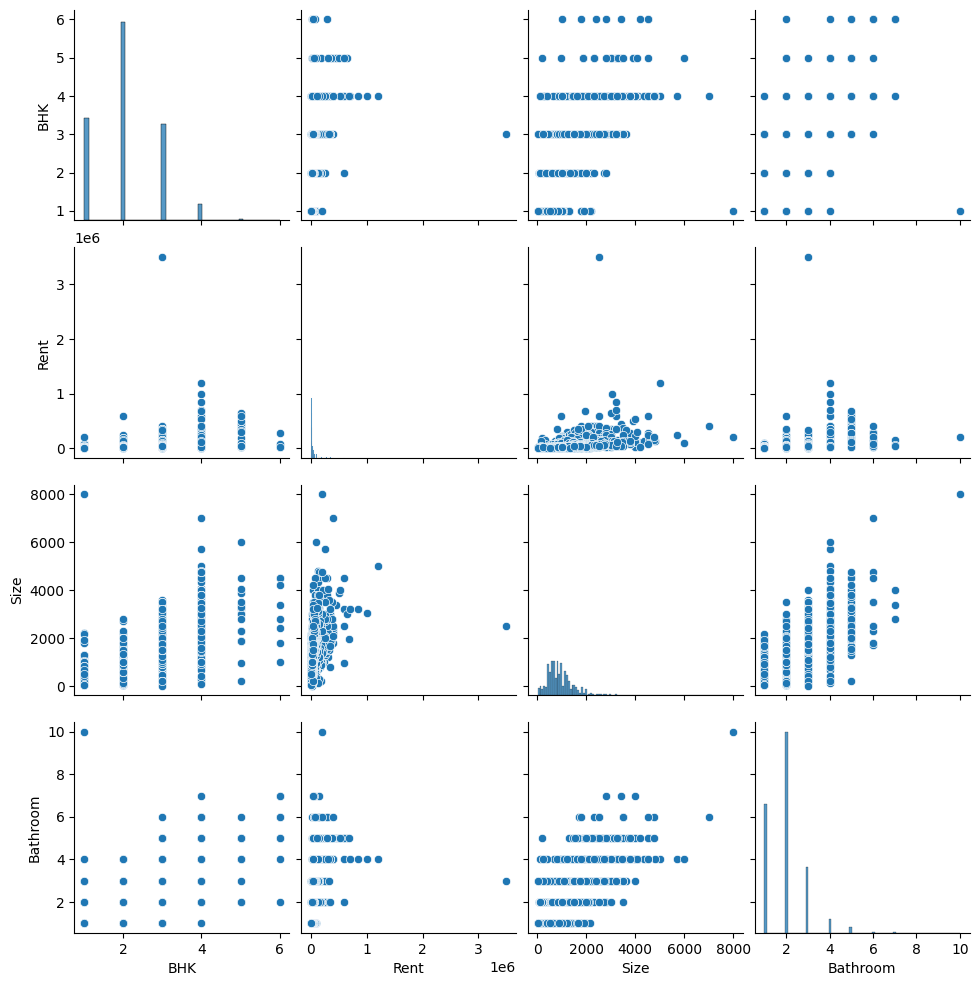

In [185]:
df.duplicated().any()

df.drop_duplicates(inplace=True)

df.reset_index(drop=True,inplace=True)
sns.pairplot(data=df)

In [186]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [187]:
for col in ['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact']:
    print(f'number of column {col} is : ',df[col].nunique())
    print(f'number of column {col} is : ',df[col].unique())

number of column Posted On is :  81
number of column Posted On is :  ['5/18/2022' '5/13/2022' '5/16/2022' '7/4/2022' '5/9/2022' '4/29/2022'
 '6/21/2022' '6/7/2022' '6/20/2022' '5/23/2022' '5/14/2022' '5/5/2022'
 '6/1/2022' '5/17/2022' '6/9/2022' '7/2/2022' '6/14/2022' '6/15/2022'
 '5/28/2022' '5/22/2022' '6/18/2022' '6/25/2022' '6/22/2022' '5/21/2022'
 '6/26/2022' '6/16/2022' '6/29/2022' '5/10/2022' '5/12/2022' '6/3/2022'
 '5/31/2022' '6/10/2022' '6/24/2022' '4/30/2022' '5/27/2022' '6/6/2022'
 '5/20/2022' '5/26/2022' '7/3/2022' '4/23/2022' '6/19/2022' '7/6/2022'
 '6/4/2022' '5/30/2022' '6/8/2022' '5/3/2022' '5/7/2022' '6/27/2022'
 '5/15/2022' '4/28/2022' '6/28/2022' '6/23/2022' '6/13/2022' '5/4/2022'
 '4/25/2022' '5/6/2022' '6/30/2022' '7/1/2022' '6/17/2022' '6/11/2022'
 '5/11/2022' '6/12/2022' '6/5/2022' '5/25/2022' '5/24/2022' '5/19/2022'
 '4/24/2022' '4/27/2022' '5/8/2022' '4/26/2022' '6/2/2022' '5/29/2022'
 '7/7/2022' '7/8/2022' '7/9/2022' '7/5/2022' '5/1/2022' '4/13/2022'
 '5/2/20

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   float64
 3   Size               4746 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 445.1+ KB


In [189]:
df['Posted On'].head()

,Posted On
0,5/18/2022
1,5/13/2022
2,5/16/2022
3,7/4/2022
4,5/9/2022


In [190]:
df['Posted On'] = pd.to_datetime(df['Posted On'], errors='coerce')

df['Day'] = df['Posted On'].dt.day
df['Month'] = df['Posted On'].dt.month
df['Year'] = df['Posted On'].dt.year
df['DayOfWeek'] = df['Posted On'].dt.dayofweek
df['IsWeekend'] = (df['Posted On'].dt.dayofweek >= 5).astype(int)
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Day,Month,Year,DayOfWeek,IsWeekend
0,2022-05-18,2,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner,18,5,2022,2,0
1,2022-05-13,2,20000.0,850.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,13,5,2022,4,0
2,2022-05-16,2,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,16,5,2022,0,0
3,2022-07-04,2,10000.0,850.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner,4,7,2022,0,0
4,2022-05-09,2,7500.0,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner,9,5,2022,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000.0,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2.0,Contact Owner,18,5,2022,2,0
4742,2022-05-15,3,29000.0,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Owner,15,5,2022,6,1
4743,2022-07-10,3,35000.0,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Agent,10,7,2022,6,1
4744,2022-07-06,3,45000.0,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2.0,Contact Agent,6,7,2022,2,0


In [191]:
df = df.drop('Posted On', axis=1)


In [192]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Day', 'Month', 'Year', 'DayOfWeek', 'IsWeekend'],
      dtype='object')

In [193]:
df['Floor'] = df['Floor'].str.replace('Ground', '0')
temp = df['Floor'].str.split(' out of ', expand=True)
df['Floor_Number'] = pd.to_numeric(temp[0], errors='coerce')
df['Total_Floors'] = pd.to_numeric(temp[1], errors='coerce')
df.drop(columns=['Floor'], inplace=True)


In [194]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Day', 'Month', 'Year', 'DayOfWeek', 'IsWeekend', 'Floor_Number',
       'Total_Floors'],
      dtype='object')

In [195]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Day,Month,Year,DayOfWeek,IsWeekend,Floor_Number,Total_Floors
0,2,10000.0,1100.0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner,18,5,2022,2,0,0.0,2.0
1,2,20000.0,850.0,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,13,5,2022,4,0,1.0,3.0
2,2,17000.0,1000.0,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,16,5,2022,0,0,1.0,3.0
3,2,10000.0,850.0,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner,4,7,2022,0,0,1.0,2.0
4,2,7500.0,850.0,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner,9,5,2022,0,0,1.0,2.0


In [196]:
df['Floor_Number'] = df['Floor_Number'].astype('Int64')
df['Total_Floors'] = df['Total_Floors'].astype('Int64')
df['Floor_Number'].fillna(df['Floor_Number'].median(), inplace=True)
df['Floor_Number'] = df['Floor_Number'].astype(int)


/tmp/ipython-input-3536357530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Floor_Number'].fillna(df['Floor_Number'].median(), inplace=True)


In [197]:
df['Floor_Number'].isnull().sum()

np.int64(0)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   float64
 2   Size               4746 non-null   float64
 3   Area Type          4746 non-null   object 
 4   Area Locality      4746 non-null   object 
 5   City               4746 non-null   object 
 6   Furnishing Status  4746 non-null   object 
 7   Tenant Preferred   4746 non-null   object 
 8   Bathroom           4746 non-null   float64
 9   Point of Contact   4746 non-null   object 
 10  Day                4746 non-null   int32  
 11  Month              4746 non-null   int32  
 12  Year               4746 non-null   int32  
 13  DayOfWeek          4746 non-null   int32  
 14  IsWeekend          4746 non-null   int64  
 15  Floor_Number       4746 non-null   int64  
 16  Total_Floors       4742 

In [199]:
df['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [207]:
df['Area Locality'].nunique()
df['Area_Locality_TE'] = df.groupby('Area Locality')['Rent'].transform('mean')
df.drop(columns=['Area Locality'], inplace=True)


In [208]:
df

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Day,Month,Year,DayOfWeek,IsWeekend,Floor_Number,Total_Floors,Area_Locality_TE
0,2,10000.0,1100.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner,18,5,2022,2,0,0,2,8250.000000
1,2,20000.0,850.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,13,5,2022,4,0,1,3,11750.000000
2,2,17000.0,1000.0,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,16,5,2022,0,0,1,3,23187.500000
3,2,10000.0,850.0,Super Area,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner,4,7,2022,0,0,1,2,16000.000000
4,2,7500.0,850.0,Carpet Area,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner,9,5,2022,0,0,1,2,7500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000.0,1000.0,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2.0,Contact Owner,18,5,2022,2,0,3,5,15750.000000
4742,3,29000.0,2000.0,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Owner,15,5,2022,6,1,1,4,29000.000000
4743,3,35000.0,1750.0,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Agent,10,7,2022,6,1,3,5,30555.555556
4744,3,45000.0,1500.0,Carpet Area,Hyderabad,Semi-Furnished,Family,2.0,Contact Agent,6,7,2022,2,0,23,34,43879.310345


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   float64
 2   Size               4746 non-null   float64
 3   Area Type          4746 non-null   object 
 4   Area Locality      4746 non-null   object 
 5   City               4746 non-null   object 
 6   Furnishing Status  4746 non-null   object 
 7   Tenant Preferred   4746 non-null   object 
 8   Bathroom           4746 non-null   float64
 9   Point of Contact   4746 non-null   object 
 10  Day                4746 non-null   int32  
 11  Month              4746 non-null   int32  
 12  Year               4746 non-null   int32  
 13  DayOfWeek          4746 non-null   int32  
 14  IsWeekend          4746 non-null   int64  
 15  Floor_Number       4746 non-null   int64  
 16  Total_Floors       4742 

In [210]:
from sklearn.preprocessing import LabelEncoder
lb_city = LabelEncoder()
df['City'] = lb_city.fit_transform(df['City'])
df = pd.get_dummies(df, columns=[
    'Area Type',
    'Furnishing Status',
    'Tenant Preferred',
    'Point of Contact'
], drop_first=True)


In [211]:
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BHK                                4746 non-null   int64  
 1   Rent                               4746 non-null   float64
 2   Size                               4746 non-null   float64
 3   City                               4746 non-null   int64  
 4   Bathroom                           4746 non-null   float64
 5   Day                                4746 non-null   int32  
 6   Month                              4746 non-null   int32  
 7   Year                               4746 non-null   int32  
 8   DayOfWeek                          4746 non-null   int32  
 9   IsWeekend                          4746 non-null   int64  
 10  Floor_Number                       4746 non-null   int64  
 11  Total_Floors                       4742 non-null   Int64

,0
BHK,0
Rent,0
Size,0
City,0
Bathroom,0
Day,0
Month,0
Year,0
DayOfWeek,0
IsWeekend,0


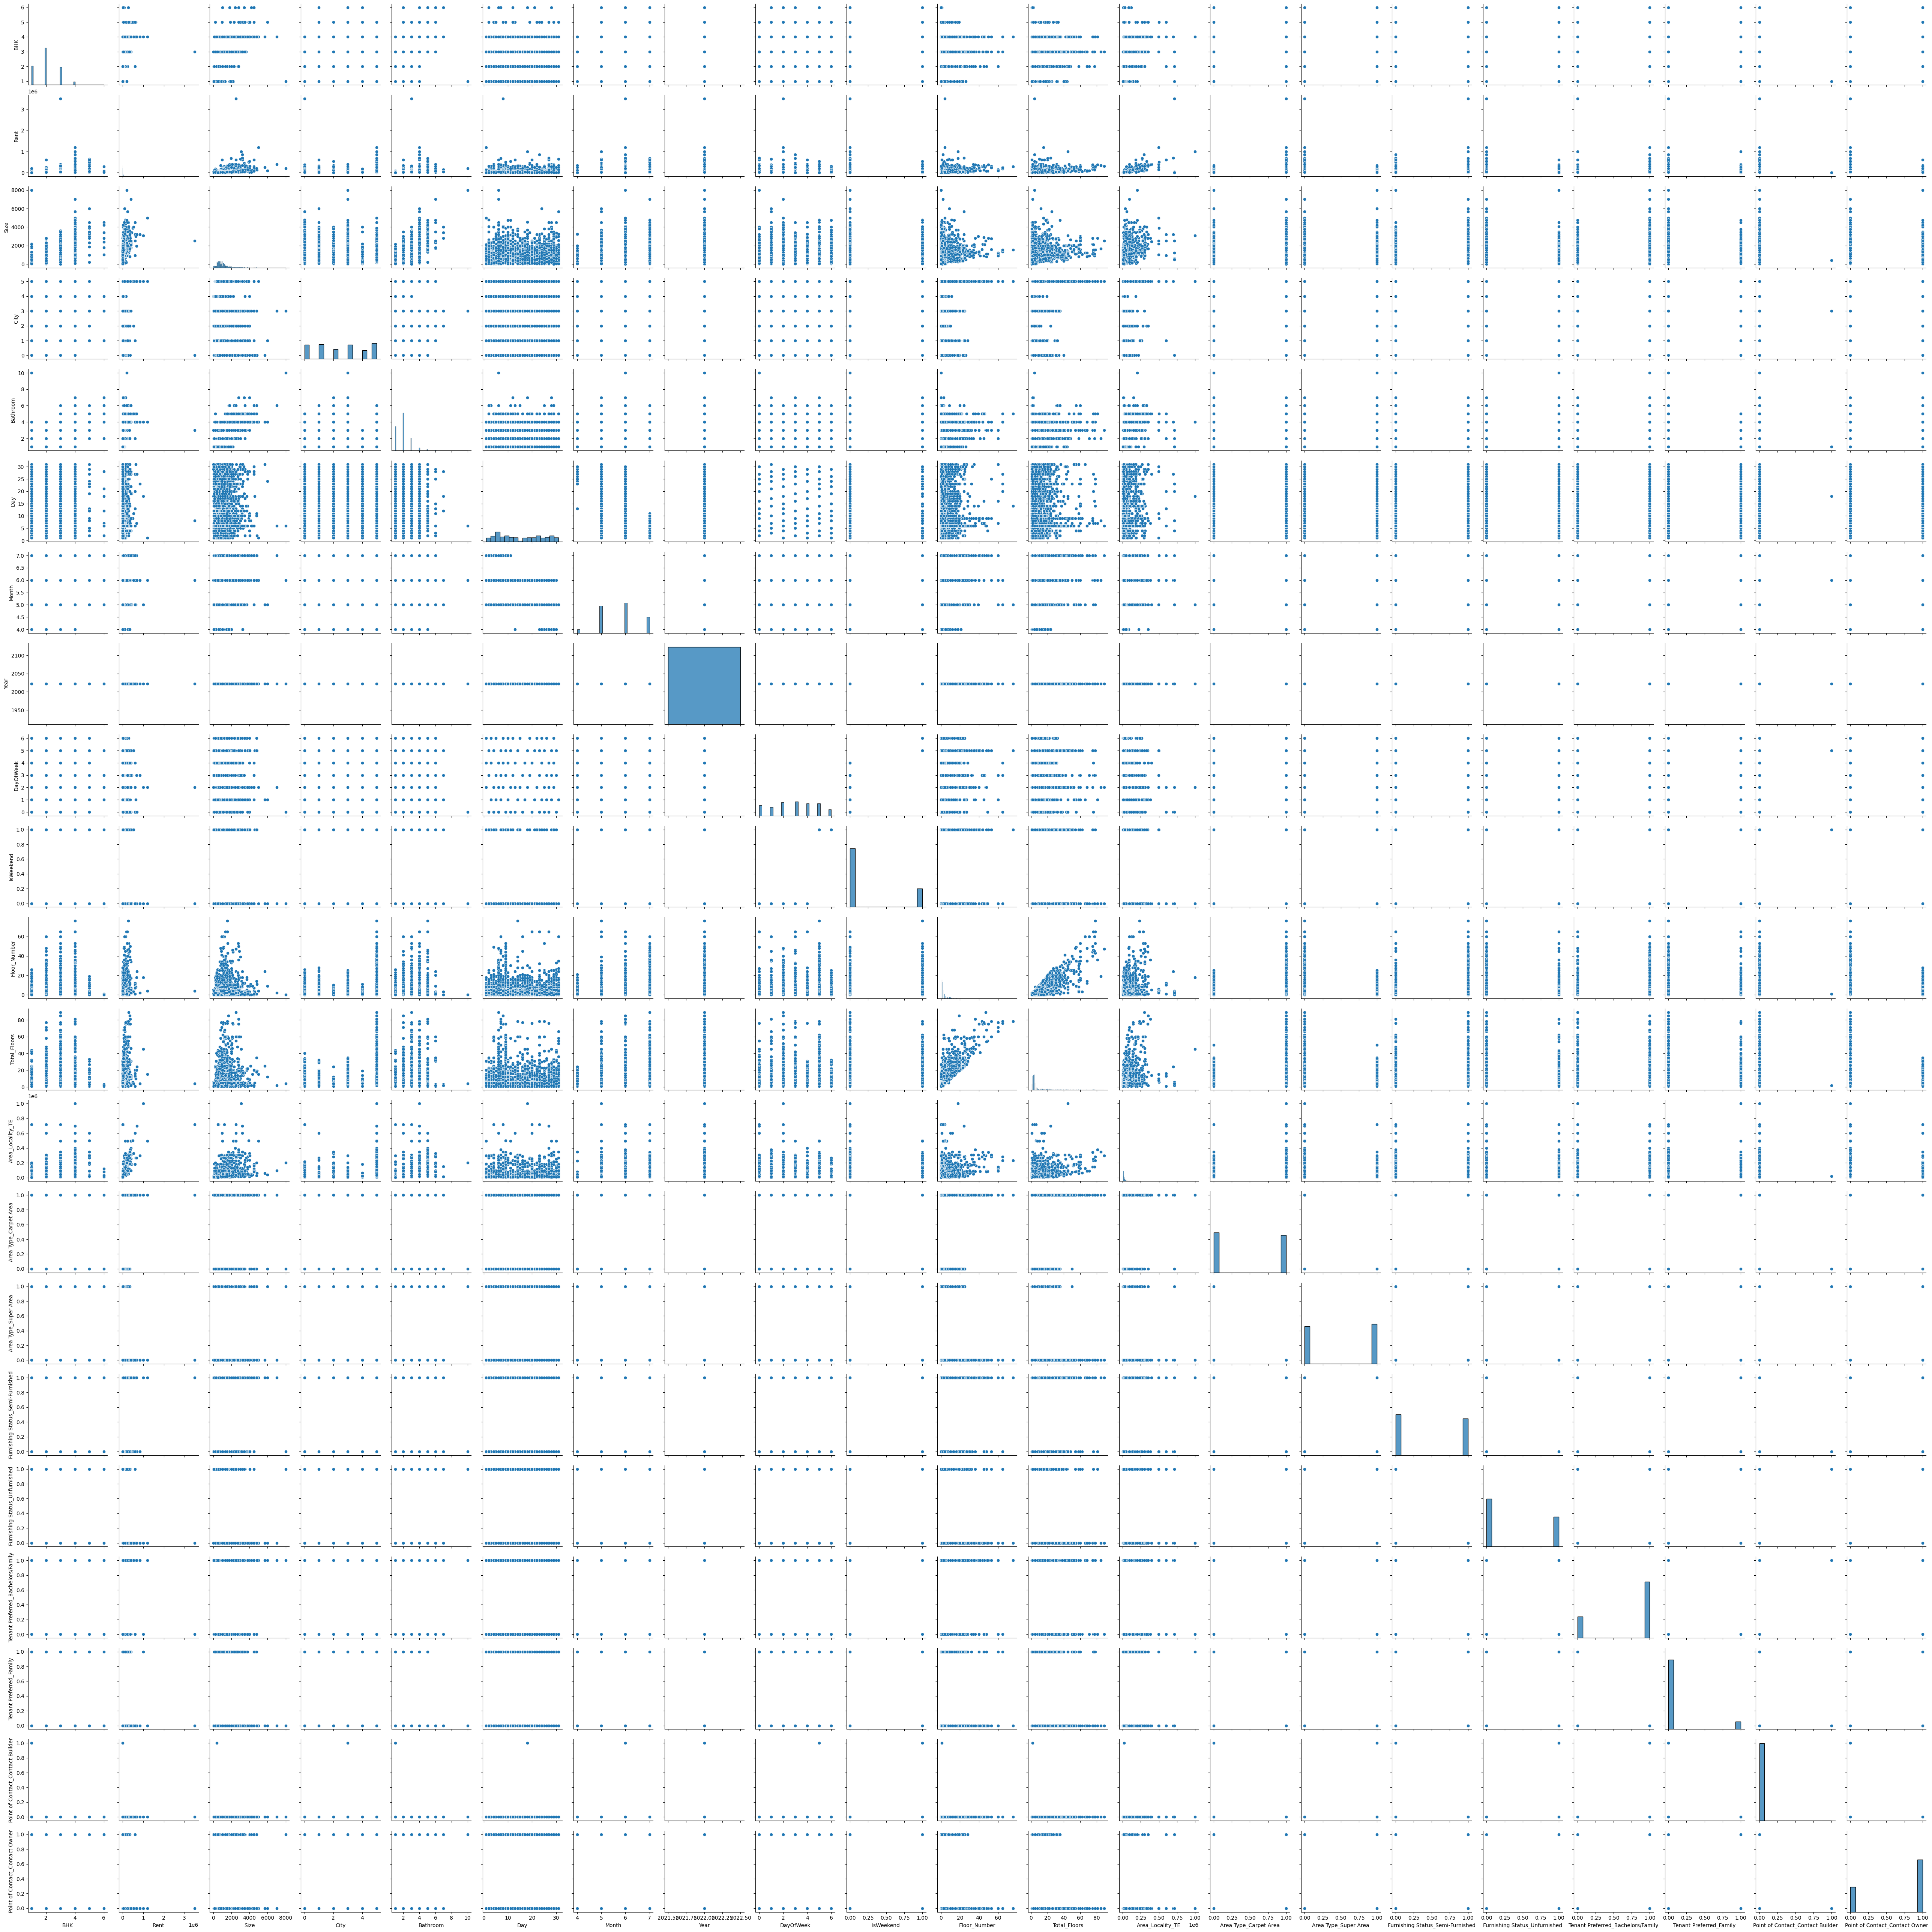

In [213]:
sns.pairplot(data=df)

In [215]:
df['Total_Floors'].unique()


<IntegerArray>
[   2,    3,    1,    4,    5,   14,    8,    6,   19,   10,    7,   13,   78,
   18,   12,   24,   31,   21,   23,   20,    9,   22,   58,   16,   66,   48,
   40,   44,   42,   41,   60,   32,   30,   29,   89,   15,   11,   28,   17,
   45,   35,   75,   38,   51,   43,   25,   27,   26,   76,   36,   37,   55,
   68,   77,   50,   59,   62,   39,   52,   54,   33,   46,   85,   71,   81,
   34, <NA>]
Length: 67, dtype: Int64

In [216]:
df['Total_Floors'].fillna(df['Total_Floors'].median(), inplace=True)
df['Total_Floors'] = df['Total_Floors'].astype(int)


In [217]:
df['Total_Floors'].unique()


array([ 2,  3,  1,  4,  5, 14,  8,  6, 19, 10,  7, 13, 78, 18, 12, 24, 31,
       21, 23, 20,  9, 22, 58, 16, 66, 48, 40, 44, 42, 41, 60, 32, 30, 29,
       89, 15, 11, 28, 17, 45, 35, 75, 38, 51, 43, 25, 27, 26, 76, 36, 37,
       55, 68, 77, 50, 59, 62, 39, 52, 54, 33, 46, 85, 71, 81, 34])

In [218]:
from sklearn.preprocessing import RobustScaler

scale_cols = ['BHK','Size','Bathroom','Floor_Number','Total_Floors',
              'Day','Month','Year','DayOfWeek','IsWeekend','Area_Locality_TE']

scaler = RobustScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [219]:
df

,BHK,Rent,Size,City,Bathroom,Day,Month,Year,DayOfWeek,IsWeekend,...,Total_Floors,Area_Locality_TE,Area Type_Carpet Area,Area Type_Super Area,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,0.0,10000.0,0.384615,4,0.0,0.2500,-1.0,0.0,-0.5,0.0,...,-0.50,-0.385208,False,True,False,True,True,False,False,True
1,0.0,20000.0,0.000000,4,-1.0,-0.0625,-1.0,0.0,0.5,0.0,...,-0.25,-0.227016,False,True,True,False,True,False,False,True
2,0.0,17000.0,0.230769,4,-1.0,0.1250,-1.0,0.0,-1.5,0.0,...,-0.25,0.289933,False,True,True,False,True,False,False,True
3,0.0,10000.0,0.000000,4,-1.0,-0.6250,1.0,0.0,-1.5,0.0,...,-0.50,-0.034926,False,True,False,True,True,False,False,True
4,0.0,7500.0,0.000000,4,-1.0,-0.3125,-1.0,0.0,-1.5,0.0,...,-0.50,-0.419106,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0.0,15000.0,0.230769,3,0.0,0.2500,-1.0,0.0,-0.5,0.0,...,0.25,-0.046225,True,False,True,False,True,False,False,True
4742,1.0,29000.0,1.769231,3,1.0,0.0625,-1.0,0.0,1.5,1.0,...,0.00,0.552645,False,True,True,False,True,False,False,True
4743,1.0,35000.0,1.384615,3,1.0,-0.2500,1.0,0.0,1.5,1.0,...,0.25,0.622953,True,False,True,False,True,False,False,False
4744,1.0,45000.0,1.000000,3,0.0,-0.5000,1.0,0.0,-0.5,0.0,...,7.50,1.225156,True,False,True,False,False,True,False,False


In [220]:
X = df.drop(columns=['Rent'])
y = df['Rent']

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)